In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [4]:
X = pd.read_csv("insurance.csv")

In [5]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
X.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df = X.copy()

## Descriptive analysis

1. Rata - Rata Umur pengguna

In [10]:
mean_age = df["age"].mean()
mean_age

39.20702541106129

2. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

In [11]:
mean_female_age = df[(df["sex"] == "female") & (df["smoker"] == "yes")]["age"].mean()
mean_female_age

38.608695652173914

In [12]:
mean_male_age = df[(df["sex"] == "male")& (df["smoker"] == "yes")]["age"].mean()
mean_male_age

38.44654088050314

3. BMI mana yang lebih tinggi, seseorang laki-laki atau perempuan?

In [13]:
mean_male_bmi = df[df["sex"] == "male"]["bmi"].mean()
mean_male_bmi

30.943128698224832

In [14]:
mean_female_bmi = df[df["sex"] == "female"]["bmi"].mean()
mean_female_bmi

30.377749244713023

4. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

In [15]:
mean_smoker_bmi = df[df["smoker"] == "yes"]["bmi"].mean()
mean_smoker_bmi

30.708448905109503

In [16]:
mean_nonsmoker_bmi = df[df["smoker"] == "no"]["bmi"].mean()
mean_nonsmoker_bmi

30.651795112781922

5. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

In [17]:
mean_smoker_charges = df[df["smoker"] == "yes"]["charges"].mean()
mean_smoker_charges

32050.23183153285

In [18]:
mean_nonsmoker_charges = df[df["smoker"] == "no"]["charges"].mean()
mean_nonsmoker_charges

8434.268297856199

-- Data yang diambil pengguna asuransi memiliki rata-rata umur kisaran 39.2 atau
39 tahun. Untuk rata-rata umur perokok antar gender, perempuan > male (38.6>38.4).
BMI merupakan berat massa tubuh pada seseorang dimana hal tersebut berpengaruh pada Kesehatan, pada data BMI laki-laki > perempuan (Male : 30,94 ; Female :30,37) hal ini menunjukan bahwa BMI tersebut masuk pada kategori Obesitas yaitu > 30. Sedangkan untuk BMI kategori rokok, ( Perokok : 30.65 > Non perokok : 30.70).
Untuk biaya tagihan pengguna asuransi, (perokok : 32050,23183 Usd > non perokok : 8434,268298 Usd)

## Analisa Variabel Kategorik (PMF)

1. Gender mana yang memiliki tagihan paling tinggi?

In [19]:
mean_female_charges = df[df["sex"] == "female"]["charges"].mean()
mean_female_charges

12569.57884383534

In [20]:
mean_male_charges = df[df["sex"] == "male"]["charges"].mean()
mean_male_charges

13956.751177721886

2. Distribusi peluang tagihan di tiap-tiap region

In [21]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [22]:
prob_charges_southwest = df[df["region"] == "southwest"]["charges"].sum() / df["charges"].sum()
prob_charges_southwest

0.22599651943564628

In [23]:
prob_charges_southeast = df[df["region"] == "southeast"]["charges"].sum() / df["charges"].sum()
prob_charges_southeast

0.30208057164798174

In [24]:
prob_charges_northwest = df[df["region"] == "northwest"]["charges"].sum() / df["charges"].sum()
prob_charges_northwest

0.2272894669011652

In [25]:
prob_charges_northeast = df[df["region"] == "northeast"]["charges"].sum() / df["charges"].sum()
prob_charges_northeast

0.24463344201520673

In [26]:
data_prob_dist = {"Region": ['southwest', 'southeast', 'northwest', 'northeast'], "Probability": [prob_charges_southwest, prob_charges_southeast, prob_charges_northwest, prob_charges_northeast]}

df_prob_distribution = pd.DataFrame(data = data_prob_dist)

In [27]:
data_prob_dist

{'Region': ['southwest', 'southeast', 'northwest', 'northeast'],
 'Probability': [0.22599651943564628,
  0.30208057164798174,
  0.2272894669011652,
  0.24463344201520673]}

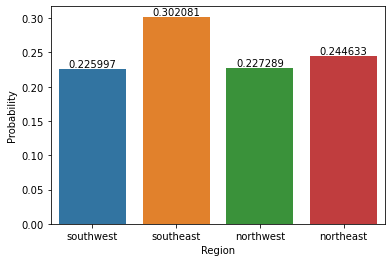

In [28]:
# sns.barplot(data = df_prob_distribution, x="Region", y="Probability")

ax = sns.barplot(x='Region', y='Probability',
                 data=df_prob_distribution,
                 errwidth=0)

for i in ax.containers:
    ax.bar_label(i,)

3. Mana yang lebih tinggi proporsi perokok atau non perokok?

In [29]:
df_data_proportion = df.groupby(['region', 'smoker'])['smoker'].count().to_frame()

In [30]:
df_data_proportion

smoker
region    smoker        
northeast no         257
          yes         67
northwest no         267
          yes         58
southeast no         273
          yes         91
southwest no         267
          yes         58

<AxesSubplot:xlabel='region'>

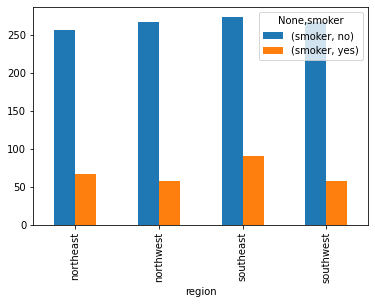

In [31]:
df_data_proportion.unstack().plot(kind='bar')

# ax = sns.barplot(x =df_data_proportion.index, y='smoker',
#                  data=df_data_proportion.unstack(),
#                  errwidth=0)

# for i in ax.containers:
#     ax.bar_label(i,)

4. Apakah setiap region memiliki proporsi data banyak orang yang sama?

In [32]:
df_data_proportion2 = df.groupby(['region'])["charges"].count().to_frame().reset_index()

In [33]:
df_data_proportion2

,region,charges
0,northeast,324
1,northwest,325
2,southeast,364
3,southwest,325


<AxesSubplot:xlabel='region', ylabel='charges'>

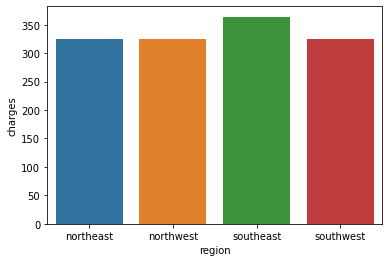

In [34]:
sns.barplot(data = df_data_proportion2, x = "region", y="charges")

5. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [35]:
df[(df["sex"] == "male") & (df["smoker"] == "yes")]["smoker"].count()/df[df["smoker"] == "yes"]["smoker"].count()

0.5802919708029197

In [36]:
df[(df["sex"] == "female") & (df["smoker"] == "yes")]["smoker"].count()/df[df["smoker"] == "yes"]["smoker"].count()

0.4197080291970803

## Analisa Variabel Kontinu

1. Mana yang lebih mungkin terjadi

    a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

In [37]:
sum_bmi_above25_charge_above16 = df[(df["bmi"] > 25) & (df["charges"] > 16_700)]["charges"].count()
sum_bmi_above25_charge_above16

283

In [38]:
sum_bmi_above25 = df[(df["bmi"] > 25)]["bmi"].count()
sum_bmi_above25

1091

In [39]:
#P(Charges>16.700|BMI>25)

prob1 = sum_bmi_above25_charge_above16/sum_bmi_above25
prob1

0.25939505041246563

    b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

In [40]:
sum_bmi_below25_charge_above16 = df[(df["bmi"] < 25) & (df["charges"] > 16_700)]["charges"].count()
sum_bmi_below25_charge_above16

51

In [41]:
sum_bmi_below25 = df[(df["bmi"] < 25)]["bmi"].count()
sum_bmi_below25

245

In [42]:
#P(Charges>16.700|BMI<25)
prob2 = sum_bmi_below25_charge_above16/sum_bmi_below25
prob2

0.20816326530612245

2. Mana yang lebih mungkin terjadi

    a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

In [43]:
sum_smoker_bmi_above25_charge_above16 = df[(df["bmi"] > 25) & (df["smoker"] == "yes") & (df["charges"] > 16_700)]["charges"].count()
sum_smoker_bmi_above25_charge_above16

215

In [44]:
sum_smoker_bmi_above25 =  df[(df["bmi"] > 25) & (df["smoker"] == "yes")]["bmi"].count()
sum_smoker_bmi_above25

219

In [45]:
#P(Charges>16.700|Smoker=yes, BMI>25)
prob3 = sum_smoker_bmi_above25_charge_above16/sum_smoker_bmi_above25
prob3

0.9817351598173516

    b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

In [46]:
sum_nonsmoker_bmi_above25_charge_above16 = df[(df["bmi"] > 25) & (df["smoker"] == "no") & (df["charges"] > 16_700)]["charges"].count()
sum_nonsmoker_bmi_above25_charge_above16

68

In [47]:
sum_nonsmoker_bmi_above25 =  df[(df["bmi"] > 25) & (df["smoker"] == "no")]["bmi"].count()
sum_nonsmoker_bmi_above25

872

In [48]:
#P(Charges>16.700|Smoker=yes, BMI>25)
prob3 = sum_nonsmoker_bmi_above25_charge_above16/sum_nonsmoker_bmi_above25
prob3

0.0779816513761468

## Analisa Korelasi Variabel

<AxesSubplot:xlabel='children', ylabel='charges'>

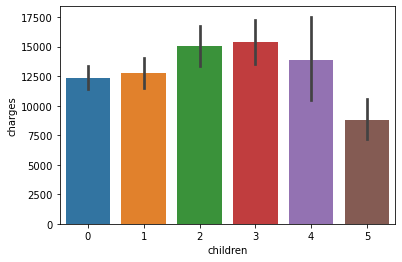

In [49]:
sns.barplot(data = df, x = df["children"], y=df["charges"])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

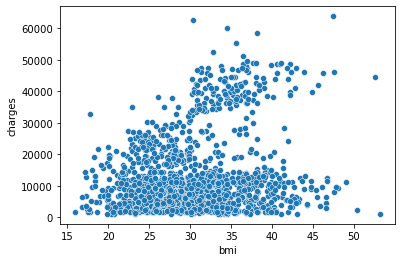

In [50]:
sns.scatterplot(data = df, x = df["bmi"], y=df["charges"])

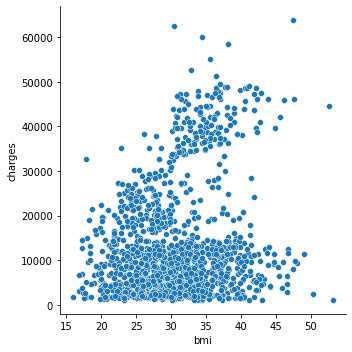

In [51]:
sns.relplot(data = df, x = df["bmi"], y=df["charges"])

In [52]:
df_corr = df.copy()

In [53]:
df_corr["Sex - Female"] = df_corr[df_corr["sex"] == "female"]["sex"]

In [54]:
df_corr["Sex - Male"] = df_corr[df_corr["sex"] == "male"]["sex"]

In [55]:
df_corr["Smoker - Yes"] = df_corr[df_corr["smoker"] == "yes"]["smoker"]
df_corr["Smoker - No"] = df_corr[df_corr["smoker"] == "no"]["smoker"]

In [56]:
df_corr["Region - northeast"] = df_corr[df_corr["region"] == "northeast"]["region"]
df_corr["Region - northwest"] = df_corr[df_corr["region"] == "northwest"]["region"]
df_corr["Region - southeast"] = df_corr[df_corr["region"] == "southeast"]["region"]
df_corr["Region - southwest"] = df_corr[df_corr["region"] == "southwest"]["region"]

In [57]:
df_corr.drop(columns=["sex","region","smoker"], axis=1, inplace= True)

In [58]:
df_corr

,age,bmi,children,charges,Sex - Female,Sex - Male,Smoker - Yes,Smoker - No,Region - northeast,Region - northwest,Region - southeast,Region - southwest
0,19,27.900,0,16884.92400,female,NaN,yes,NaN,NaN,NaN,NaN,southwest
1,18,33.770,1,1725.55230,NaN,male,NaN,no,NaN,NaN,southeast,NaN
2,28,33.000,3,4449.46200,NaN,male,NaN,no,NaN,NaN,southeast,NaN
3,33,22.705,0,21984.47061,NaN,male,NaN,no,NaN,northwest,NaN,NaN
4,32,28.880,0,3866.85520,NaN,male,NaN,no,NaN,northwest,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,NaN,male,NaN,no,NaN,northwest,NaN,NaN
1334,18,31.920,0,2205.98080,female,NaN,NaN,no,northeast,NaN,NaN,NaN
1335,18,36.850,0,1629.83350,female,NaN,NaN,no,NaN,NaN,southeast,NaN
1336,21,25.800,0,2007.94500,female,NaN,NaN,no,NaN,NaN,NaN,southwest


In [59]:
df_corr.columns

Index(['age', 'bmi', 'children', 'charges', 'Sex - Female', 'Sex - Male',
       'Smoker - Yes', 'Smoker - No', 'Region - northeast',
       'Region - northwest', 'Region - southeast', 'Region - southwest'],
      dtype='object')

In [60]:
df_corr[['Sex - Female', 'Sex - Male',
       'Smoker - Yes', 'Smoker - No', 'Region - northeast',
       'Region - northwest', 'Region - southeast', 'Region - southwest']] = df_corr[['Sex - Female', 'Sex - Male',
       'Smoker - Yes', 'Smoker - No', 'Region - northeast',
       'Region - northwest', 'Region - southeast', 'Region - southwest']].apply(lambda x: x.factorize()[0])

In [61]:
df_corr.corr(min_periods=3, method="pearson")

,age,bmi,children,charges,Sex - Female,Sex - Male,Smoker - Yes,Smoker - No,Region - northeast,Region - northwest,Region - southeast,Region - southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,-0.025019,0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,0.003750,-0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,0.007673,-0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,0.787251,-0.787251,0.006349,-0.039905,0.073982,-0.043210
Sex - Female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,-0.076185,0.076185,0.002425,0.011156,-0.017117,0.004184
Sex - Male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,0.076185,-0.076185,-0.002425,-0.011156,0.017117,-0.004184
Smoker - Yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,1.000000,-1.000000,0.002811,-0.036945,0.068498,-0.036945
Smoker - No,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,-1.000000,1.000000,-0.002811,0.036945,-0.068498,0.036945
Region - northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,0.002811,-0.002811,1.000000,-0.320177,-0.345561,-0.320177
Region - northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,-0.036945,0.036945,-0.320177,1.000000,-0.346265,-0.320829


## Pengujian Hipotesis

1. Uji: Tagihan Perokok Lebih Besar dari Tagihan Non Perokok

TOTAL SMOKER VS TOTAL NON-SMOKER

In [62]:
n_smoker = df[df["smoker"] == "yes"]["charges"].count() 
n_smoker

274

In [63]:
n_nonsmoker = df[df["smoker"] == "no"]["charges"].count() 
n_nonsmoker

1064

MEAN SMOKER VS MEAN NON-SMOKER

In [64]:
mean_charges_smoker = df[df["smoker"] == "yes"]["charges"].mean() 
mean_charges_smoker

32050.23183153285

In [65]:
mean_charges_smoker = df[df["smoker"] == "no"]["charges"].mean() 
mean_charges_smoker

8434.268297856199

VARIANCE SMOKER VS VARIANCE NON-SMOKER

In [66]:
var_smoker = np.var(df[df["smoker"] == "yes"]["charges"])
var_smoker

132721153.13625304

In [67]:
var_nonsmoker = np.var(df[df["smoker"] == "no"]["charges"])
var_nonsmoker

35891656.00316425

In [68]:
mu_smoker = n_smoker
mu_nonsmoker = n_nonsmoker

Jika hipotesis yang akan kita uji adalah:
$$H_0: \mu_{smoker} \leq \mu_{nonsmoker}$$
$$H_1: \mu_{smoker} > \mu_{nonsmoker}$$

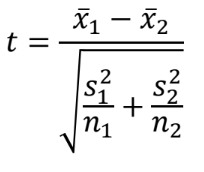

In [72]:
from scipy.stats import t
t_crit = t.ppf(alpha,df=n_smoker-1)
print(t_crit)

-1.6504337929538409


In [69]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a = df[df["smoker"] == "yes"]["charges"], b = df[df["smoker"] == "no"]["charges"], equal_var=False, alternative='less') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print('t-test = %.4f, p-value = %.4f' % (stat, p)) 

t-test = 32.7519, p-value = 1.0000


In [70]:
alpha = 0.05
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Two group means are equal (Gagal tolak H0)


2. Uji: Tagihan BMI>25 Lebih Besar dari Tagihan BMI<25

TOTAL BMI>25 VS TOTAL BMI<25

In [73]:
n_bmi_above_25 = df[df["bmi"] > 25]["charges"].count() 
n_bmi_above_25

1091

In [74]:
n_bmi_less_25 = df[df["bmi"] < 25]["charges"].count() 
n_bmi_less_25

245

MEAN BMI>25  VS MEAN BMI<25

In [75]:
mean_charges_bmi_above_25 = df[df["bmi"] > 25]["charges"].mean() 
mean_charges_bmi_above_25

13946.47603532447

In [76]:
mean_charges_bmi_less_25 = df[df["bmi"] < 25]["charges"].mean() 
mean_charges_bmi_less_25

10282.224474367351

VARIANCE BMI>25 VS VARIANCE BMI<25

In [77]:
var_bmi_above_25 = np.var(df[df["bmi"] > 25]["charges"])
var_bmi_above_25

164579189.5213265

In [78]:
var_bmi_less_25 = np.var(df[df["bmi"] < 25]["charges"])
var_bmi_less_25

56326859.63068615

Jika hipotesis yang akan kita uji adalah:
$$H_0: \mu_{bmi>25} \leq \mu_{bmi<25}$$
$$H_1: \mu_{bmi>25} > \mu_{bmi<25}$$

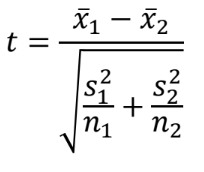

In [79]:
from scipy.stats import t
t_crit = t.ppf(alpha,df=n_bmi_above_25-1)
print(t_crit)

-1.6462514928708314


In [80]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a = df[df["bmi"] > 25]["charges"], b = df[df["bmi"] < 25]["charges"], equal_var=False, alternative='less') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print('t-test = %.4f, p-value = %.4f' % (stat, p)) 

t-test = 5.9299, p-value = 1.0000


In [81]:
alpha = 0.05
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Two group means are equal (Gagal tolak H0)


3. Uji: Tagihan Laki-Laki Lebih Besar dari Tagihan Perempuan

TOTAL Laki-Laki VS TOTAL Perempuan 

In [84]:
n_male = df[df["sex"] == "male"]["charges"].count() 
n_male

676

In [85]:
n_female = df[df["sex"] == "female"]["charges"].count() 
n_female

662

MEAN Laki-laki  VS MEAN Perempuan

In [87]:
mean_male = df[df["sex"] == "male"]["charges"].mean() 
mean_male

13956.751177721886

In [88]:
mean_female = df[df["sex"] == "female"]["charges"].mean() 
mean_female

12569.57884383534

VARIANCE Laki-laki VS VARIANCE perempuan

In [90]:
var_male = np.var(df[df["sex"] == "male"]["charges"])
var_male

167998626.4342233

In [91]:
var_female = np.var(df[df["sex"] == "female"]["charges"])
var_female

123660966.64456923

Jika hipotesis yang akan kita uji adalah:
$$H_0: \mu_{male} \leq \mu_{female}$$
$$H_1: \mu_{male} > \mu_{female}$$

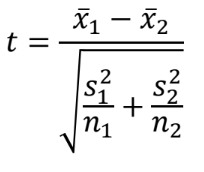

In [92]:
from scipy.stats import t
t_crit = t.ppf(alpha,df=n_male-1)
print(t_crit)

-1.6471141829675953


In [93]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a = df[df["sex"] == "male"]["charges"], b = df[df["sex"] == "female"]["charges"], equal_var=False, alternative='less') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print('t-test = %.4f, p-value = %.4f' % (stat, p)) 

t-test = 2.1009, p-value = 0.9821


In [94]:
alpha = 0.05
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Two group means are equal (Gagal tolak H0)
